In [22]:
import sys
import csv
import tweepy
import matplotlib.pyplot as plt

from collections import Counter
from aylienapiclient import textapi

In [23]:
if sys.version_info[0] < 3:
    input = raw_input

In [24]:
#Twitter credentials
consumer_key = 't3xypruG4wEJTgXVEP0yBKFtm'
consumer_secret = 'VQFWR5rBQklsMYbouDwEJ8v9hOOOKoRnClinJRIkV2FQfotuNS'
access_token = '1147496316718727169-RKKIpbDn3a1IdNNFM8SO2sTLJXFS4Y'
access_token_secret = 'RTvsvTKFjPIzBZFrdOgyL7xSj8rJdcTqS6WpAp1yTGneS'

In [25]:
#Aylien Credentials to call for the sentiment analysis
application_id = 'ade8b2e4'
application_key ='40f27d8331421cc35845d23cd5399360'

In [26]:
#Setting up the usable instance of tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [27]:
#setting up an instance of the aylien text api
client = textapi.Client(application_id, application_key)

In [28]:
#searching twitter for something that interests you
query = 'sixers' #input("What NBA team do you want to analyize? \n")
number = 25 #input("what number of tweets do you want to pull from? \n")

In [29]:
#Result type parameter identifies the tweet timeframe and can be set depending on the user needs
#Language parameter can also be change accordingly
results = api.search(
    lang = 'en',
    q = query + " -rt",
    count = number,
    result_type = "recent"
)
print("--- Gathered Tweets /n")

--- Gathered Tweets /n


--- Opened a CSV file to store the results of the sentiment analysis... 

Analyzed Tweet 1
Analyzed Tweet 2
Analyzed Tweet 3
Analyzed Tweet 4
Analyzed Tweet 5
Analyzed Tweet 6
Analyzed Tweet 7
Analyzed Tweet 8
Analyzed Tweet 9
Analyzed Tweet 10
Analyzed Tweet 11
Analyzed Tweet 12
Analyzed Tweet 13
Analyzed Tweet 14
Analyzed Tweet 15
Analyzed Tweet 16
Analyzed Tweet 17
Analyzed Tweet 18
Analyzed Tweet 19
Analyzed Tweet 20
Analyzed Tweet 21
Analyzed Tweet 22
Analyzed Tweet 23
Analyzed Tweet 24
Analyzed Tweet 25


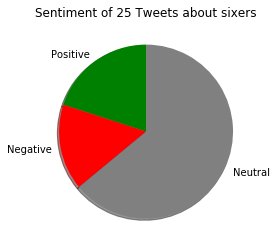

In [39]:
#open a csv file to store the tweets and their sentiment
file_name = "Sentiment_Analysis_of_{}_Tweets_About_{}.csv".format(number, query)
#Creation of the csv file
with open(file_name, 'w', newline='') as csvfile:
    csv_writer = csv.DictWriter(
        f = csvfile,
        fieldnames = ["Tweet", "Sentiment"] #Creates two columns in the excel sheet one for tweets and the other for sentiments. The columns are blank to begin with and will later be filed
    )
    csv_writer.writeheader()
    #Statusing the csv to allow the user that indeed a file has been created
    print("--- Opened a CSV file to store the results of the sentiment analysis... \n")
    #Goes line by line through the tweets identifying empty tweets
    for c, result in enumerate(results, start = 1):
        tweet = result.text
        tidy_tweet = tweet.strip().encode('ascii', 'ignore')
        
        if len(tweet) == 0:
            print('Empty Tweet')
            continue
        # Adds text and polarity into the excel sheet next to the respective tweet    
        response = client.Sentiment({'text': tidy_tweet})
        csv_writer.writerow({
            'Tweet': response['text'],
            'Sentiment': response['polarity']
        })
        print('Analyzed Tweet {}'.format(c))
#The sentiment analysis does inplant numerical data on the spread sheet
#In order to visual the results, negative, positive and neutral sentiment will be scored on a numerical basis 
with open(file_name, 'r') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['Sentiment']] += 1
    positive = counter['positive']
    negative = counter['negative']
    neutral = counter['neutral']
colors = ['green','red','grey']
sizes = [positive, negative, neutral]
labels = 'Positive','Negative','Neutral'
#Plots the numerical sentiment analysis data using the above parameters
plt.pie(
    x = sizes,
    shadow=True,
    colors = colors,
    labels = labels,
    startangle = 90
)

plt.title('Sentiment of {} Tweets about {}'.format(number, query))
plt.show()